# Assignment_Submitted by : Sunny Bhati (sbhati@iu.edu)

In [1]:
import scipy.io
import librosa
from librosa import display
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cmath
import seaborn as sns
import scipy
import IPython.display as ipd
import math
from numpy.linalg import inv
from collections import Iterable 
from ipykernel import kernelapp as app
from tqdm import tqdm
from scipy.io import wavfile
import scipy.io
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import inv

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from ipykernel import kernelapp as app


## Problem 2

In [2]:
MDS = scipy.io.loadmat('MDS_pdist.mat')

In [3]:
mij=MDS['L'] 

In [4]:
mij_row_sum=np.sum(mij, axis=1)/len(mij)  

In [5]:
mij_bar=np.zeros((len(mij),len(mij)))
for i in range(len(mij)):
    for j in range(len(mij[0])):
        mij_bar[i][j]=mij[i][j]-mij_row_sum[i]

In [6]:
mij_column_sum=np.sum(mij_bar, axis=0)/len(mij) 

In [7]:
W_ij=np.zeros((len(mij),len(mij)))
for i in range(len(mij)):
    for j in range(len(mij[0])):
        W_ij[i][j]=mij_bar[i][j]-mij_column_sum[j]

In [8]:
eigenvalues_problem1,eigenvector_problem1=np.linalg.eig(W_ij/(-2))
print(eigenvalues_problem1[0:2])

[667731.1729113 +0.j 385917.82539894+0.j]


In [9]:
eigen_values=np.sqrt(np.diag(eigenvalues_problem1.real[0:2]))
eigen_vector=eigenvector_problem1.real[:,0:2].transpose()

In [10]:
final_point=np.matmul(eigen_values,eigen_vector)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


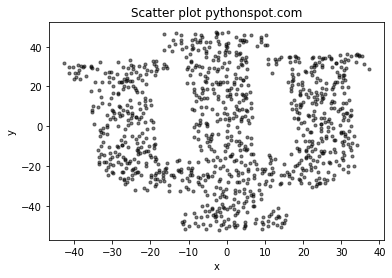

In [11]:
x=final_point[1,:]
y=final_point[0,:]
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 3

In [12]:
# Read the files
concen = scipy.io.loadmat('concentric.mat')

In [13]:
concen1=concen['X'] 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


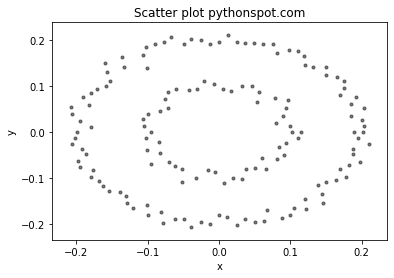

In [14]:
## Plotting the scatter plot
x=concen1[0,:]
y=concen1[1,:]
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
## Implementing the Kernel with sigma =1

Kernel=np.zeros((len(concen1[0]),len(concen1[0])))
sigma=1
for i in range(len(concen1[0])):
    for j in range(len(concen1[0])):
        Kernel[i][j]=np.exp(-1*np.linalg.norm(concen1[:,i]-concen1[:,j])**2/(sigma)**2)

In [16]:
## Calculating the eigenvalues 
eigenvalues_problem3,eigenvector_problem3=np.linalg.eig(Kernel)

In [17]:
## Calculating the top 3 eigenvector and eigenvalues
final_eigen_vector=eigenvector_problem3[:,0:3].real

In [18]:
## Projected point on the new space
projected_points=np.matmul(final_eigen_vector.transpose(),Kernel)

In [19]:
projected_points_withones=np.vstack([projected_points, [1]*152])

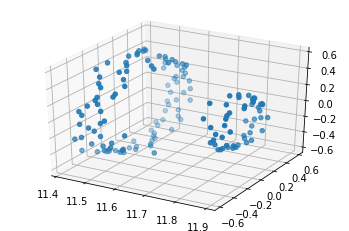

In [20]:
## Scatter plot of the transformed space
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax = plt.axes(projection='3d')
ax.scatter(projected_points[0,:], projected_points[1,:],projected_points[2,:]);

In [21]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [22]:
no_of_iterations=300000
y_train=[0]*152
for i in range(51,152):
    y_train[i]=1

In [23]:
w_ni=np.random.normal(0.002,0.001,4)*0.001
a_ini=np.reshape(w_ni,(1,4))
errorlist1=[]
iterationlist=[]
rho=0.001
for iter in tqdm(range(no_of_iterations)):
    accuracy=0
    pb_3=np.matmul(a_ini,projected_points_withones)
    pb_3_step1=sigmoid(pb_3)
    y_new=np.reshape(y_train,(1,152))
    
    err=(pb_3_step1-y_new)*(np.multiply(pb_3_step1,(1-pb_3_step1)))
    a_ini=a_ini-np.multiply(rho,np.matmul(err,projected_points_withones.T))
    
    a_trapo_with_full_X=np.matmul(a_ini,projected_points_withones)

    sigmoid_transformation=sigmoid(a_trapo_with_full_X).flatten()
  
    y_test=[0]*152
    for m in range(len(sigmoid_transformation)):
        if sigmoid_transformation[m]<0.5:
            y_test[m]=0
        else:
            y_test[m]=1

    for l in range(len(sigmoid_transformation)):
        if y_test[l]==y_train[l]:
            accuracy+=1
    acc=(accuracy/152)*100
    errorlist1.append(100-acc)
    if acc==100:
        print("Neural Network Converges at iteration number: ", iter)
        break
    

 65%|██████▌   | 195267/300000 [00:24<00:12, 8338.67it/s]

Neural Network Converges at iteration number:  195283


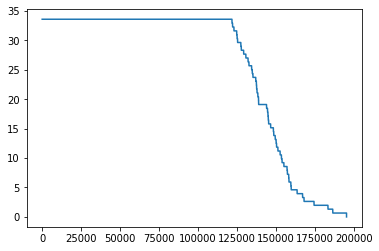

In [24]:
## Error Plot vs Iterations
plt.plot(errorlist1)
plt.show()

## Problem 4

In [25]:
concentric = scipy.io.loadmat('concentric.mat')
concentric=concentric['X']
bias=[1]*152
concentric_withones=np.vstack([concentric,bias])

In [26]:
w_layer_one=np.random.normal(0,1,9)
w_layer_two=np.random.normal(0,1,4)

In [27]:
w_layer1=np.reshape(w_layer_one,(3,3))
w_layer2=np.reshape(w_layer_two,(1,4))
rho=0.01
print("Initial weights and bias at layer 1:", w_layer1)
print("Initial weights and bias at layer 2:", w_layer2)

Initial weights and bias at layer 1: [[-1.5563165   1.28167491 -0.69092757]
 [ 0.51461318  0.96718119 -0.38380258]
 [-1.45519981 -0.12578922 -0.08658893]]
Initial weights and bias at layer 2: [[ 0.10038111 -0.61889368 -0.09770607 -1.59084837]]


In [28]:
no_of_iterations=100000

In [29]:
errorlist2=[]
for iter1 in range(no_of_iterations):
    accuracy=0
    a_tranpose_X_layer1=np.matmul(w_layer1,concentric_withones)
    
    input_X_layer2=np.array(np.vstack([sigmoid(a_tranpose_X_layer1),[1]*152]))
    
    outputlayer=np.matmul(w_layer2,input_X_layer2)
    
    final_output=sigmoid(outputlayer)
    
    y_new=np.reshape(y_train,(1,152))

    err=(final_output-y_new)*(np.multiply(final_output,(1-final_output)))
    
    w_layer2=w_layer2-np.multiply(rho,np.matmul(err,input_X_layer2.T))

    gradient_layer2=np.multiply(input_X_layer2[0:3,:],1-input_X_layer2[0:3,:])

    
    step4=np.matmul(w_layer2[:,0:3].T,err)
   
    step5=np.multiply(step4,gradient_layer2)
  
    w_layer1=w_layer1-np.multiply(rho,np.matmul(step5,concentric_withones.T))

    step6=np.matmul(w_layer1,concentric_withones)
    step7=np.vstack([sigmoid(step6),[1]*152])
    step8=np.matmul(w_layer2,step7)
    step9=sigmoid(step8).flatten()
    y_test=[0]*152
    for j in range(152):
        if step9[j]<0.5:
            y_test[j]=0
        else:
            y_test[j]=1
    for l in range(152):
        if y_test[l]==y_train[l]:
            accuracy+=1
    
    acc=(accuracy/152)*100
    errorlist2.append(100-acc)
    
    if acc==100:
        print("Neural Network Converges at iteration number: ", iter1)
        break

Neural Network Converges at iteration number:  24006


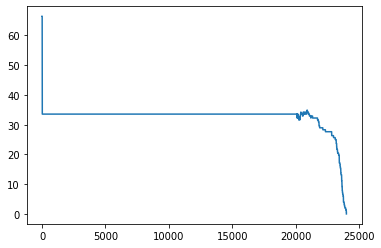

In [30]:
plt.plot(errorlist2)
plt.show()

In [31]:
print("Final_weight for layer1:",w_layer1) ## The third column contains the bias values
print("Final_weight for layer2:",w_layer2)## The fourth column contains the bias value

Final_weight for layer1: [[-12.06521813   6.89884217  -1.86406132]
 [ 10.99242756   2.38330268  -1.64992995]
 [ -0.68674099  10.51958425   1.52202115]]
Final_weight for layer2: [[10.10028206  9.53844506 -7.67303418  1.97970268]]


## Problem_1

In [32]:
from scipy.io import wavfile
import scipy.io
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import inv

# Read all input files ....
piano = wavfile.read('Piano_Clap.wav')
piano_mat = piano[1]

/opt/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [33]:
m = scipy.io.loadmat('mfcc.mat')
mfcc = m['X']
mu = scipy.io.loadmat('MuSigma.mat')

means = mu['mX']
cov = mu['Sigma']
cov_piano = cov[:,:,0]
cov_clap = cov[:,:,1]

In [34]:
# Matrix preparation
mean_piano = means[:,0]
mean_piano = mean_piano.reshape((12,1))
mean_clap = means[:,1]
mean_clap = mean_clap.reshape((12,1))

x_mean_pi = mfcc - mean_piano
x_mean_clap = mfcc - mean_clap

cov_piano_inv = inv(np.matrix(cov_piano))
cov_clap_inv = inv(np.matrix(cov_clap))

cov_piano_mod = math.sqrt(np.sqrt((cov_piano * cov_piano).sum()))
cov_clap_mod = math.sqrt(np.sqrt((cov_clap * cov_clap).sum()))

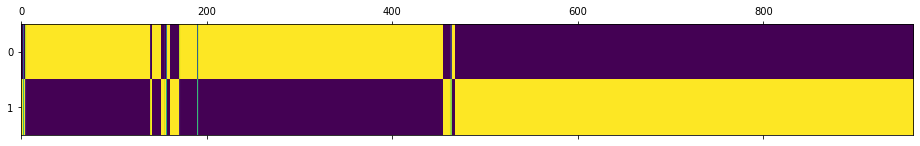

In [35]:
def gaussian(x_u,cov_mod,cov_inv):
    n1 = 1 / (2 * 3.14 * cov_mod)
    n2 = -np.exp(-0.5 * np.dot(np.dot(x_u.T, cov_inv),x_u))
    return n1*n2


piano_list = []
clap_list = []
for i in range(962):
    pi = gaussian(x_mean_pi[:, i].reshape((12, 1)), cov_piano_mod, cov_piano_inv)
    piano_list.append(pi[0, 0])

    cl = gaussian(x_mean_clap[:, i].reshape((12, 1)), cov_clap_mod, cov_clap_inv)
    clap_list.append(cl[0, 0])

p = np.array([piano_list,clap_list])
p_sum = np.sum(p,axis=0).reshape((1,962))
p_tilda = p / p_sum

plt.matshow(p_tilda,aspect='auto',cmap="viridis")
plt.show()

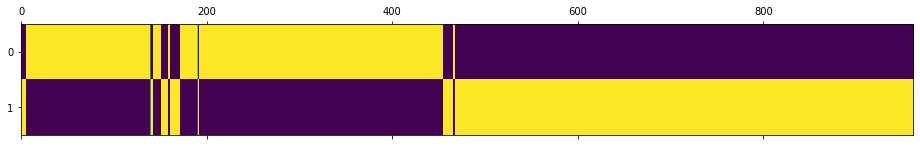

In [36]:
t = np.array([[0.9,0.1],[0,1]])
p_bar = np.zeros((2,962))
p_bar[:,0] = p_tilda[:,0]

for i in range(0,961):
    b = np.argmax(p_tilda[:,i])
    p_bar[:,i+1] = t[b,:] * p_tilda[:,i+1]

p_bar_sum = np.sum(p_bar,axis=0).reshape((1,962))
p_bar = p_bar/p_bar_sum

plt.matshow(p_bar,aspect='auto',cmap="viridis")
plt.show()

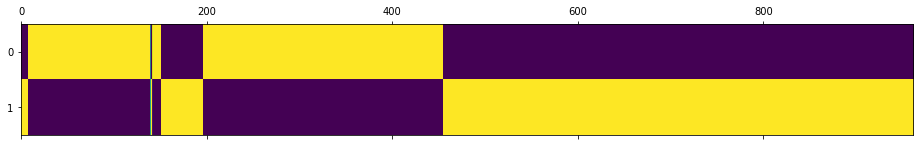

In [37]:
B = np.zeros((2, 962))
p_bar2 = np.zeros((2, 962))
p_bar2[:, 0] = p_tilda[:, 0]

for i in range(961):
    b1 = np.argmax(np.multiply(t[:, 0], p_bar2[:, i]))
    B[0, i + 1] = b1
    p_bar2[0, i + 1] = np.dot(np.dot(t[b1, 0], p_bar2[b1, i]), p[0, i + 1])

    b2 = np.argmax(np.multiply(t[:, 1], p_bar2[:, i]))
    B[1, i + 1] = b2
    p_bar2[1, i + 1] = np.dot(np.dot(t[b2, 1], p_bar2[b2, i]), p[1, i + 1])
    p_bar2[:, i + 1] = p_bar2[:, i + 1] / np.sum(p_bar2[:, i + 1])

plt.matshow(p_bar2, aspect='auto', cmap="viridis")
plt.show()

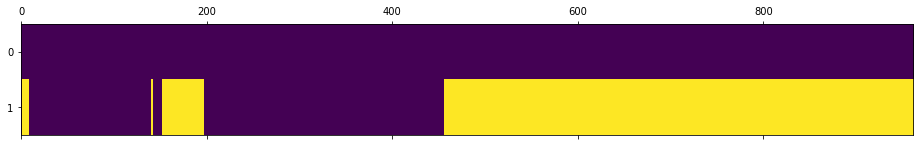

In [38]:
plt.matshow(B, aspect='auto', cmap="viridis")
plt.show()

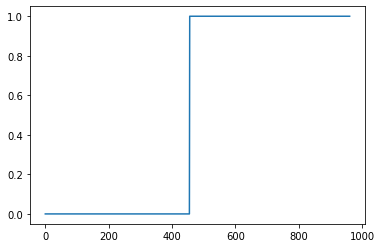

 65%|██████▌   | 195267/300000 [00:40<00:12, 8338.67it/s]

In [39]:
states = []
m = np.argmax(p_bar2[:,961])
item = int(B[m,961])
states.append(B[m,961])
for i in reversed(range(961)):
    states.append(B[item,i])
    item = int(B[item,i])

plt.plot(states[::-1])
plt.show()